#EDA

In [ ]:
pip install arch

In [ ]:
import pandas as pd
import yfinance as yf
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import arch

In [ ]:
SP500 = yf.download("^GSPC", period='5y', auto_adjust=True)
SP500['Date']=pd.to_datetime(SP500.index)
SP500.set_index("Date", inplace=True)
returns = np.log(SP500['Close'] / SP500['Close'].shift(1)).dropna()


[*********************100%%**********************]  1 of 1 completed


#Arch

In [107]:
from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal

am = arch.arch_model(returns, vol="arch", p=1, o=0, q=1, dist="Normal")

res=am.fit()
print(res.summary())
estimated_volatility = res.conditional_volatility

Iteration:      1,   Func. Count:      5,   Neg. LLF: 969114646813.4244
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2095241.7283917596
Iteration:      3,   Func. Count:     28,   Neg. LLF: 23696.952070017644
Iteration:      4,   Func. Count:     36,   Neg. LLF: 295562.7724353636
Iteration:      5,   Func. Count:     43,   Neg. LLF: 16122885.351921516
Iteration:      6,   Func. Count:     54,   Neg. LLF: 929220.9374313588
Iteration:      7,   Func. Count:     65,   Neg. LLF: 57085.96409879013
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3820.2721797619497
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 7
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Li

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001808. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


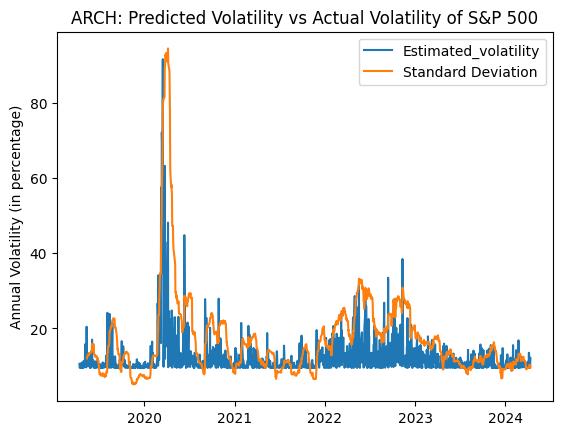

In [108]:

plt.plot(estimated_volatility *1000, label="Estimated_volatility")
plt.plot(df['vol_std'], label="Standard Deviation")

plt.ylabel('Annual Volatility (in percentage)')
plt.legend(loc='upper right')
plt.title('ARCH: Predicted Volatility vs Actual Volatility of S&P 500')
plt.show()

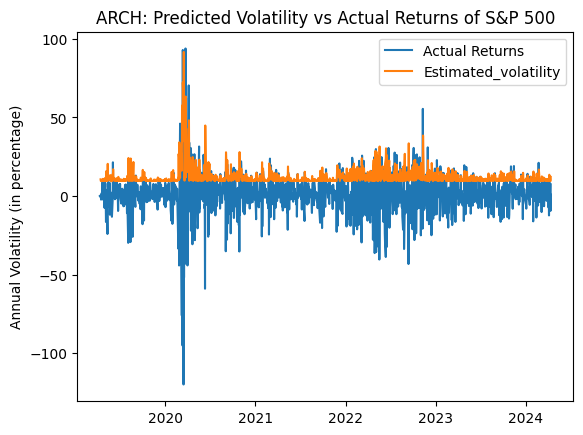

In [101]:
plt.plot(SP500['Daily']*1000, label="Actual Returns")

plt.plot(estimated_volatility *1000, label="Estimated_volatility")
plt.ylabel('Annual Volatility (in percentage)')
plt.legend(loc='upper right')
plt.title('ARCH: Predicted Volatility vs Actual Returns of S&P 500')
plt.show()

#GARCH

In [ ]:
SP500['Daily']=SP500['Close'].pct_change(1) # 1 for ONE DAY lookback
SP500 ['Volatility'] = SP500 ['Daily'].rolling(window=2).std()
SP500['Daily']=SP500['Daily'].fillna(0)

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002127. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 10918268964.589422
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3407872669950178.0
Iteration:      3,   Func. Count:     34,   Neg. LLF: 2.308230713928255e+19
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3106.3612556647345
            Iterations: 3
            Function evaluations: 44
            Gradient evaluations: 3


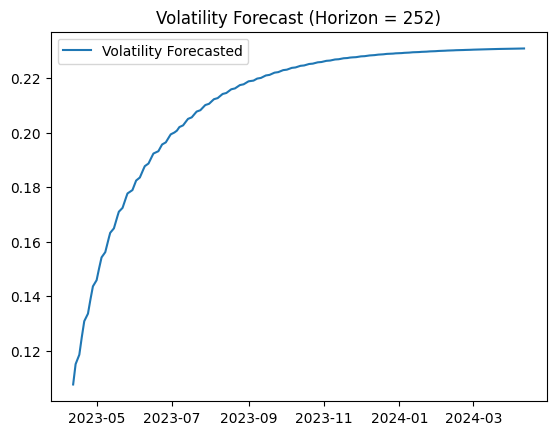

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3106.36
Distribution:                  Normal   AIC:                          -6204.72
Method:            Maximum Likelihood   BIC:                          -6185.07
                                        No. Observations:                 1005
Date:                Fri, Apr 12 2024   Df Residuals:                     1004
Time:                        05:41:09   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.5826e-04  6.520e-07   1316.333      0.000 [8.

In [ ]:
import pandas as pd
import numpy as np
import arch
import matplotlib.pyplot as plt

# Load the SPY data
#data = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

# Calculate log returns
returns = np.log(SP500['Close'] / SP500['Close'].shift(1)).dropna()

# Define the forecast horizon
h = 252

# Split data into training and testing sets
train_set = returns[:-h]

# Fit the GARCH(1,1) model
am = arch.arch_model(train_set, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit()

# Generate volatility forecast
forecast = res.forecast(horizon=h)
vol_forc = np.sqrt(forecast.variance.iloc[-1:]) * np.sqrt(252)
vol_forecasted = []
for i in range(h):
    vol_forecasted.append(vol_forc.iloc[0].iat[i])

# Plot the actual and forecasted volatility
plt.title('Volatility Forecast (Horizon = 252)')
plt.plot(SP500.index[-h:], vol_forecasted, label='Volatility Forecasted')
#plt.plot(SP500.index[-h:], returns[-h:], label='Actual Volatility')
plt.legend()
plt.show()
print(res.summary())


In [ ]:
vol = []  # List to store the forecasted volatilities
vol_std = []  # List to store the standard volatilities

# Loop over the data, with a window size of 21
for i in range(len(x) - 21):
    x_test = x[i:i+21]  # Extract a window of data with length 21
    vol_standard = np.std(x_test) * np.sqrt(252)  # Calculate the standard volatility
    am = arch.arch_model(x_test, vol="Garch", p=1, o=0, q=1, dist="Normal")  # Fit the GARCH(1,1) model
    res = am.fit()  # Obtain the model results
    forecast = res.forecast(horizon=1)  # Generate a volatility forecast for 1 step ahead
    vol_forc = np.sqrt(forecast.variance.iloc[-1:1]) * np.sqrt(252)  # Calculate the forecasted volatility
    vol.append(vol_forc.iloc[0])  # Append the forecasted volatility to the list
    vol_std.append(vol_standard)  # Append the standard volatility to the list

Streaming output truncated to the last 5000 lines.
Optimization terminated successfully    (Exit mode 0)
            Current function value: 34.82926139793815
            Iterations: 14
            Function evaluations: 72
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 47.839895999303806
Iteration:      2,   Func. Count:     13,   Neg. LLF: 34.663945653231025
Iteration:      3,   Func. Count:     18,   Neg. LLF: 34.65266027816036
Iteration:      4,   Func. Count:     23,   Neg. LLF: 34.65259850462581
Iteration:      5,   Func. Count:     27,   Neg. LLF: 34.6525985046678
Optimization terminated successfully    (Exit mode 0)
            Current function value: 34.65259850462581
            Iterations: 5
            Function evaluations: 27
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 10540863.63348503
Iteration:      2,   Func. Count:     13,   Neg. LLF: 34.60558016537774
Iteration:      3,   Func. C

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


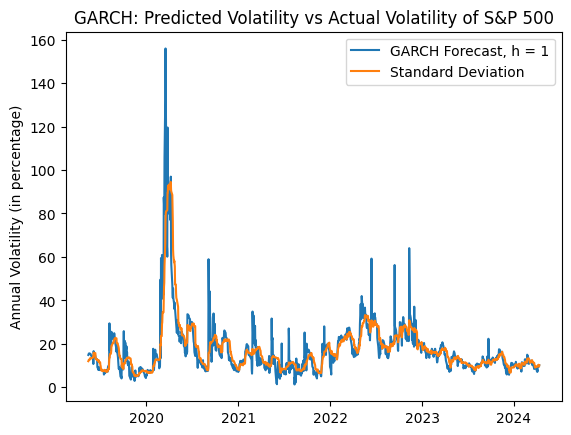

In [ ]:
#print(vol)
#print(len(vol))
#print(len(x))
#print(len(x[21:]))

x_sample = x[21:]
df = pd.DataFrame()
df['returns'] = x_sample
df['vol_GARCH'] = vol
df['vol_std'] = vol_std

plt.plot(df['vol_GARCH'], label="GARCH Forecast, h = 1")
plt.plot(df['vol_std'], label="Standard Deviation")
plt.ylabel('Annual Volatility (in percentage)')
plt.legend(loc='upper right')
plt.title('GARCH: Predicted Volatility vs Actual Volatility of S&P 500')
plt.show()

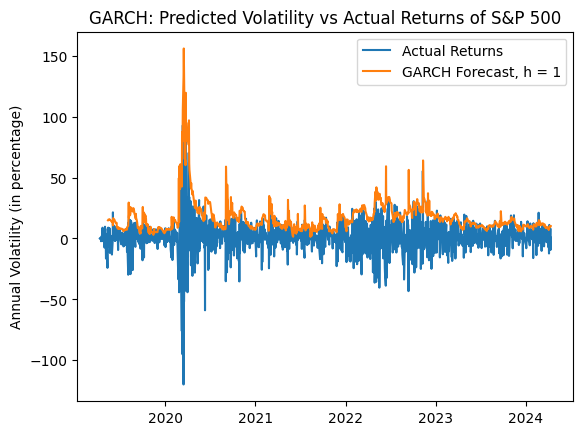

In [ ]:
plt.plot(SP500['Daily']*1000, label="Actual Returns")

plt.plot(df['vol_GARCH'], label="GARCH Forecast, h = 1")

plt.ylabel('Annual Volatility (in percentage)')
plt.legend(loc='upper right')
plt.title('GARCH: Predicted Volatility vs Actual Returns of S&P 500')
plt.show()
